### Simple Dense Neural network model to classify Traffic signs.

In this code, we implement Dense neural network model to classify the traffic signs.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pathlib
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

data_dir = pathlib.Path('GTSRB_subset_2')  #Folder path containing data (download from datasets folder)

#print(list(data_dir.glob('*/*.jpg'))[:5])


image_count = len(list(data_dir.glob('*/*.jpg')))  ##Calcuate total images
print("Total Images: ",image_count)

# Since data is images separated in different folders, we can label them and create a dictionary 
#to hold labels mapped to file paths. 

Signs_images_dict = {
    'Snow': list(data_dir.glob('class1/*')),
    'Speed20': list(data_dir.glob('class2/*'))
}

#Dictionary to map labels to class numbers.

Signs_labels_dict = {
    'Snow': 0,
    'Speed20': 1,
}


X_Images, Y_Labels = [], []

# Process images and labels and add to array. We fetch image class and images from their file path, 
# resize to 64x64 then add to list.

for Sign_name, images in Signs_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(64,64))
        X_Images.append(resized_img)
        Y_Labels.append(Signs_labels_dict[Sign_name])


#Convert List to numpy arrays
X_Images = np.array(X_Images)
Y_Labels = np.array(Y_Labels)


#Split Total images to Train and Test
X_train_1, X_test, Y_train_1, Y_test = train_test_split(X_Images, Y_Labels, test_size=0.2, random_state=0, stratify=Y_Labels)


#Split Train images to Train and Validation
X_train, X_Val, Y_train, Y_Val = train_test_split(X_train_1, Y_train_1, test_size=0.1, random_state=0, stratify=Y_train_1)


X_train, X_Val, X_test = X_train / 255.0, X_Val / 255.0, X_test / 255.0  #Normalize data 


print("Training Data:")
print(X_train.shape)
print(Y_train.shape)
print()

print("Validation Data:")
print(X_Val.shape)
print(Y_Val.shape)
print()

print("Test Data:")
print(X_test.shape)
print(Y_test.shape)
print()


Total Images:  660
Training Data:
(475, 64, 64, 3)
(475,)

Validation Data:
(53, 64, 64, 3)
(53,)

Test Data:
(132, 64, 64, 3)
(132,)



#### Create a Dense model

In [11]:
model = Sequential()

model.add(keras.layers.Flatten(input_shape=(64,64,3)))  # Flatten input image to a vector


# Add a full connected layers
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(10, activation='relu'))


model.add(keras.layers.Dense(1,activation='sigmoid'))

tf.keras.optimizers.SGD(learning_rate=0.002)  #SGD Optimiser

loss_fun = keras.losses.BinaryCrossentropy()

model.compile(loss=loss_fun, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 12288)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                122890    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 123,011
Trainable params: 123,011
Non-trainable params: 0
_________________________________________________________________


#### Train the model and fetch accuracy

Epoch 1/10
48/48 [==============================] - 4s 15ms/step - loss: 0.6882 - accuracy: 0.7937 - val_loss: 0.1752 - val_accuracy: 0.9057
Epoch 2/10
48/48 [==============================] - 0s 9ms/step - loss: 0.1811 - accuracy: 0.9347 - val_loss: 0.1040 - val_accuracy: 0.9434
Epoch 3/10
48/48 [==============================] - 0s 9ms/step - loss: 0.1538 - accuracy: 0.9621 - val_loss: 0.0711 - val_accuracy: 0.9434
Epoch 4/10
48/48 [==============================] - 0s 9ms/step - loss: 0.1068 - accuracy: 0.9705 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 5/10
48/48 [==============================] - 0s 9ms/step - loss: 0.0921 - accuracy: 0.9768 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 6/10
48/48 [==============================] - 0s 10ms/step - loss: 0.0426 - accuracy: 0.9895 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 7/10
48/48 [==============================] - 0s 9ms/step - loss: 0.0304 - accuracy: 0.9895 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 8/10
48/48 [

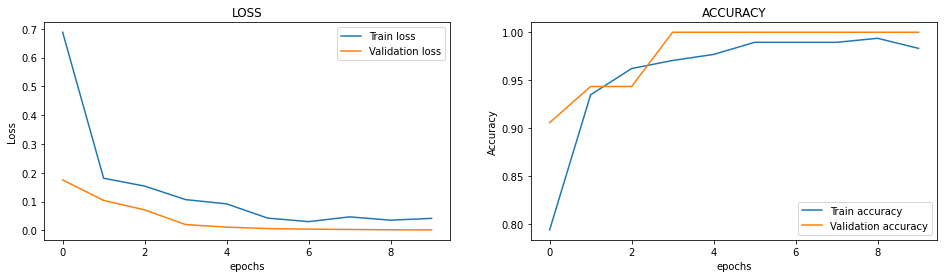

In [12]:
#TRAIN THE MODEL
tr_hist = model.fit(X_train, Y_train, batch_size=10, epochs=10, verbose=1, validation_data=(X_Val, Y_Val))


acc = model.evaluate(X_test, Y_test, verbose=1)    #Test Data Accuracy
print(f'Accuracy of Test data is: {acc[1]*100} %')

#Plot graphs
plt.figure(figsize=(16,4))  
plt.subplot(1, 2, 1)

plt.plot(tr_hist.history['loss'],label="Train loss")
plt.plot(tr_hist.history['val_loss'],label="Validation loss", linestyle='-')
plt.title('LOSS')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(tr_hist.history['accuracy'],label="Train accuracy")
plt.plot(tr_hist.history['val_accuracy'],label="Validation accuracy", linestyle='-')
plt.title('ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(loc='lower right')
plt.show()


**Check their classification report**

In [13]:
BATCH = model.predict(X_test)
BA=np.round(BATCH)
print(classification_report(Y_test, BA))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        42

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132

